# Testing scripts

A simple notebook to test the data generators and the simulators


In [1]:
%matplotlib inline
import math
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import deque
import copy
import random


In [2]:
import gener 
import detec
import simul


# Generators

## Pydata scripts testing

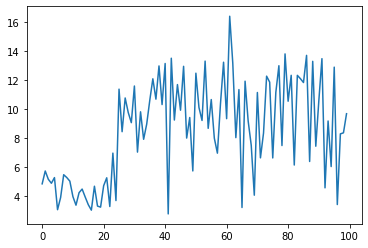

In [3]:
gen = gener.ChangingDistributionGenerator(stats.norm, {"loc":4,"scale":1}, stats.norm, {"loc":10,"scale":3},25)

vals = np.zeros(100)
for i in range(100):
    vals[i] = gen.get()

plt.plot(vals)

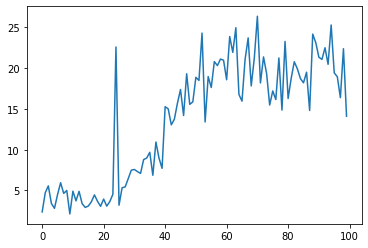

In [4]:
gen2 = gener.DriftGenerator(stats.norm, {'loc': 4, 'scale':1}, stats.norm, {'loc':20, 'scale': 3}, 25, 30)
vals2 = np.zeros(100)
for i in range(100):
    vals2[i] = gen2.get()
    
plt.plot(vals2)

## Bayesian notebook testing

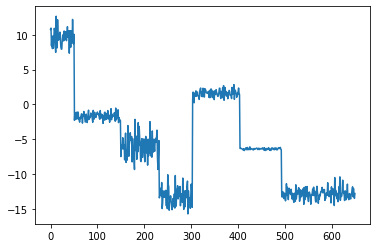

In [5]:
data = gener.generate_normal_time_series(7, 50, 200)
#input: num, minl=50, maxl=1000
plt.plot(data)

# Detectors 

In [6]:
import detec
from collections import deque

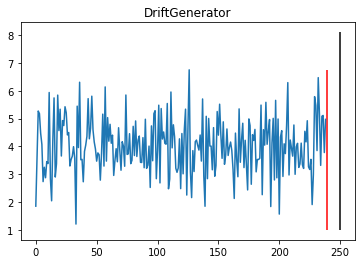

11.0

In [7]:
detector = detec.ThreshDetector(0.2, 10)
gen2 = gener.DriftGenerator(stats.norm, {'loc': 4, 'scale':1}, stats.norm, {'loc':20, 'scale': 3}, 250, 100)
simulator1 = simul.Simulator([gen2], detector, 1200)

simulator1.run(plot=True)

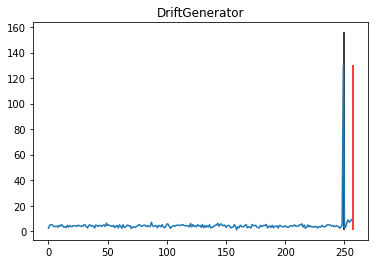

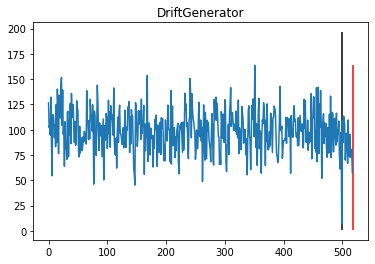

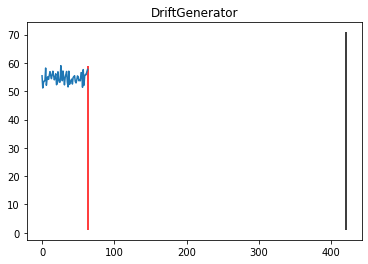

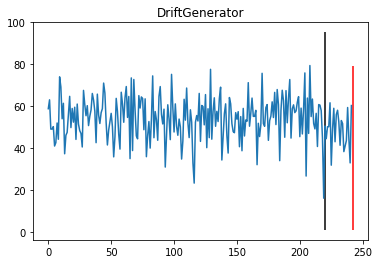

179.0991345596064

In [8]:
gen1 = gener.DriftGenerator(stats.norm, {"loc":4,"scale":1}, stats.norm, {"loc":100,"scale":20},250,100)
gen2 = gener.DriftGenerator(stats.norm, {"loc":100,"scale":20}, stats.norm, {"loc":4,"scale":1},500,50)
gen3 = gener.DriftGenerator(stats.norm, {"loc":55,"scale":2}, stats.norm, {"loc":55,"scale":10},421,100)
gen4 = gener.DriftGenerator(stats.norm, {"loc":55,"scale":10}, stats.norm, {"loc":20,"scale":3},220,125)
gens = [gen1, gen2, gen3, gen4]
detector = detec.WindowedMonteCarloDetector(100, 10, confidence=0.5)
simulator = simul.Simulator(gens, detector)
simulator.run(plot=True)